# PREDICTION OF PATIENT STATUS
    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand  

In [4]:
data2=pd.read_csv('patient_data_covid.csv')
data2.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1.0,Male,0.0,5.0,difficulty breathing or shortness of breath,diarrhoea,fever,Seviour,Covid
1,31/01/20,6:00 PM,Kerala,1.0,Female,0.0,8.0,chest pain or pressure,sore throat,tiredness,Mild,flu
2,02-01-2020,6:00 PM,Kerala,2.0,Male,0.0,39.0,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
3,02-02-2020,6:00 PM,Kerala,3.0,Female,0.0,63.0,loss of speech or movement,sore throat,tiredness,Seviour,Covid
4,02-03-2020,6:00 PM,Kerala,3.0,Male,0.0,6.0,chest pain or pressure,"a rash on skin, or discolouration of fingers o...",dry cough,Moderate,flu


In [5]:
#ENCODING THE DATA WITH INTEGER VALUES
data2.Gender[data2.Gender=='Male ']=1
data2.Gender[data2.Gender=='Female']=2

data2.Serious_symptoms[data2.Serious_symptoms=='difficulty breathing or shortness of breath']=1
data2.Serious_symptoms[data2.Serious_symptoms=='chest pain or pressure']=2
data2.Serious_symptoms[data2.Serious_symptoms=='loss of speech or movement']=3

data2.Less_common_symptoms[data2.Less_common_symptoms=='diarrhoea']=1
data2.Less_common_symptoms[data2.Less_common_symptoms=='sore throat']=2
data2.Less_common_symptoms[data2.Less_common_symptoms=='conjunctivitis']=3
data2.Less_common_symptoms[data2.Less_common_symptoms=='a rash on skin, or discolouration of fingers or toes']=4
data2.Less_common_symptoms[data2.Less_common_symptoms=='loss of taste or smell']=5
data2.Less_common_symptoms[data2.Less_common_symptoms=='aches and pains']=6
data2.Less_common_symptoms[data2.Less_common_symptoms=='headache']=7

data2.Most_common_symptoms[data2.Most_common_symptoms=='fever']=1
data2.Most_common_symptoms[data2.Most_common_symptoms=='tiredness']=2
data2.Most_common_symptoms[data2.Most_common_symptoms=='dry cough']=3

data2.Severity[data2.Severity=='Seviour']=1
data2.Severity[data2.Severity=='Mild']=2
data2.Severity[data2.Severity=='Moderate']=3

data2.Patient_Status[data2.Patient_Status=='Covid']=1
data2.Patient_Status[data2.Patient_Status=='flu']=2

data2 = data2[pd.to_numeric(data2['ConfirmedIndianNational']).notnull()]
data2['ConfirmedIndianNational'] =data2['ConfirmedIndianNational'].astype('int')  
data2 = data2[pd.to_numeric(data2['Gender']).notnull()]  
data2['Gender'] =data2['Gender'].astype('int')  
data2 = data2[pd.to_numeric(data2['Serious_symptoms']).notnull()]  
data2['Serious_symptoms'] =data2['Serious_symptoms'].astype('int') 
data2 = data2[pd.to_numeric(data2['Less_common_symptoms']).notnull()]  
data2['Less_common_symptoms'] =data2['Less_common_symptoms'].astype('int') 
data2 = data2[pd.to_numeric(data2['Serious_symptoms']).notnull()]  
data2['Most_common_symptoms'] =data2['Most_common_symptoms'].astype('int') 
data2 = data2[pd.to_numeric(data2['Most_common_symptoms']).notnull()]  
data2['Severity'] =data2['Severity'].astype('int') 
data2 = data2[pd.to_numeric(data2['Patient_Status']).notnull()]  
data2['Patient_Status'] =data2['Patient_Status'].astype('int') 


C:\Users\jahnvi jain\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jahnvi jain\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jahnvi jain\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
#AFTER ENCODING THE DATA
data2

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,1,0.0,5.0,1,1,1,1,1
1,31/01/20,6:00 PM,Kerala,1,2,0.0,8.0,2,2,2,2,2
2,02-01-2020,6:00 PM,Kerala,2,1,0.0,39.0,3,3,2,1,2
3,02-02-2020,6:00 PM,Kerala,3,2,0.0,63.0,3,2,2,1,1
4,02-03-2020,6:00 PM,Kerala,3,1,0.0,6.0,2,4,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,17/06/20,8:00 AM,Tripura,0,1,0.0,87.0,2,3,3,2,1
3131,17/06/20,8:00 AM,Uttarakhand,0,2,0.0,78.0,2,4,3,1,2
3132,17/06/20,8:00 AM,Uttar Pradesh,0,1,0.0,69.0,3,3,1,2,2
3133,17/06/20,8:00 AM,West Bengal,0,2,0.0,80.0,2,7,2,2,2


In [7]:
data2.dtypes

Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational       int32
Gender                        int32
ConfirmedForeignNational    float64
Age                         float64
Serious_symptoms              int32
Less_common_symptoms          int32
Most_common_symptoms          int32
Severity                      int32
Patient_Status                int32
dtype: object

In [8]:
#SPITING FEATURES AND PATIENT STATUS
feature_data = data2[['Gender', 'Age', 'Serious_symptoms', 'Less_common_symptoms', 'Most_common_symptoms', 'Severity']]
X = np.asarray(feature_data)  

In [9]:
data2['Patient_Status'] = data2['Patient_Status'].astype('int')  
y = np.asarray(data2['Patient_Status'])
y [0:5]

array([1, 2, 2, 1, 2])

In [10]:
# SPLITTING OF DATA INTO TRAINING AND TEST DATA
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2508, 6) (2508,)
Test set: (627, 6) (627,)


In [11]:
# KNN MODEL FOR PREDICTION OF PATIENT STATUS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred [0:10]
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of K-NN classifier on training set: 0.69


In [12]:
y_pred [0:70]==y_test[0:70]

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True, False, False,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True,  True,  True,  True])

Confusion matrix
[[145 154]
 [155 173]]


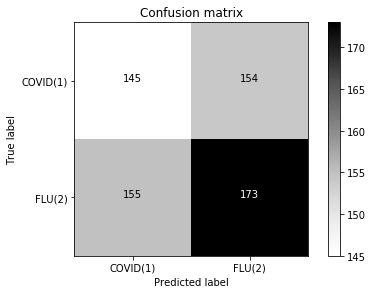

In [13]:
#BUILING CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Greys):
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max()/ 2)+70
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  # explained in the end


cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,2])
print("Confusion matrix")

print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID(1)','FLU(2)'],title='Confusion matrix')


# SEVERITY GAUGING CLASSIFIER

In [14]:
feature_data2 = data2[['Gender', 'Age', 'Serious_symptoms', 'Less_common_symptoms', 'Most_common_symptoms']]
X = np.asarray(feature_data)  
X[0:5]

array([[ 1.,  5.,  1.,  1.,  1.,  1.],
       [ 2.,  8.,  2.,  2.,  2.,  2.],
       [ 1., 39.,  3.,  3.,  2.,  1.],
       [ 2., 63.,  3.,  2.,  2.,  1.],
       [ 1.,  6.,  2.,  4.,  3.,  3.]])

In [15]:
data2['Severity'] = data2['Severity'].astype('int')  
y = np.asarray(data2['Severity'])
y [0:5]

array([1, 2, 1, 1, 3])

In [16]:
from sklearn import preprocessing   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2508, 6) (2508,)
Test set: (627, 6) (627,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred [0:10]
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of K-NN classifier on training set: 0.88


In [18]:
y_pred [0:70]==y_test[0:70]

array([ True, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True])

Confusion matrix
[[166  44   0]
 [ 59 128  29]
 [  1  46 154]]


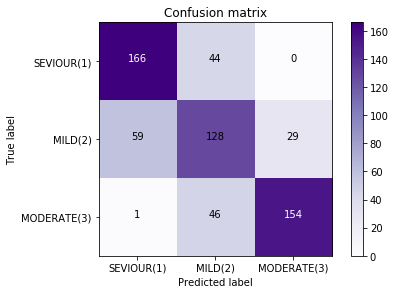

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Purples):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max()/ 2)+70
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 


cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,2,3])
print("Confusion matrix")
print(cnf_matrix)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVIOUR(1)','MILD(2)','MODERATE(3)'],title='Confusion matrix')\


# PREDICTOR OF SEVERITY OF COVID -19 BY USER FILLED SYMPTOMS

In [20]:
def Test():
    print('Are you experiencing any of the given problems : YES/NO')
    q1=input('difficulty breathing or shortness of breath : ')
    q2=input('chest pain or pressure : ')
    q3=input('loss of speech or movement : ')
    q4=input('diarrhoea: ')
    q5=input('sore throat: ')
    q6=input('conjunctivitis: ') 
    q7=input('a rash on skin, or discolouration of fingers or toes: ') 
    q8=input('loss of taste or smell: ') 
    q9=input('aches and pains: ') 
    q10=input('headache: ') 
    q11=input('fever: ') 
    q12=input('tiredness: ') 
    q13=input('dry cough: ') 
    
  
    if(age>=60 or age<=10):
        if(q1==('yes'or 'YES') or q2==('yes'or 'YES') or q3==('yes'or 'YES')):
            flag=1
        elif(q4==('yes' or 'YES') and q5==('yes' or 'YES')):
            flag=2
        elif(q5==('yes' or 'YES') and q6==('yes' or 'YES')):
            flag=2
        elif(q6==('yes' or 'YES') and q7==('yes' or 'YES')):
            flag=2   
        elif(q7==('yes' or 'YES') and q8==('yes' or 'YES')):
            flag=2
        elif(q9==('yes' or 'YES') and q10==('yes' or 'YES')):
            flag=2
        elif(q10==('yes' or 'YES') and q4==('yes' or 'YES')):
            flag=2       
        elif(q1==('no'or 'NO') and q2==('no'or 'NO') and q3==('no'or 'NO') and q4==('no'or 'NO') and q5==('no'or 'NO') and q6==('no'or 'NO') and q7==('no'or 'NO') and q8==('no'or 'NO') and q9==('no'or 'NO')and q10==('no'or 'NO') and q11==('no'or 'NO') and q12==('no'or 'NO') and q13==('no'or 'NO') ):
            flag=3
        else:                
            flag=0
    else:
        if(q1==('yes'or 'YES') or q2==('yes'or 'YES') or q3==('yes'or 'YES')):
            flag=1
        elif(q4==('yes'or 'YES') or q5==('yes'or 'YES') or q6==('yes'or 'YES') or q7==('yes'or 'YES') or q8==('yes'or 'YES') or q9==('yes'or 'YES') or q10==('yes'or 'YES')):
            flag=2
        elif(q1==('no'or 'NO') and q2==('no'or 'NO') and q3==('no'or 'NO') and q4==('no'or 'NO') and q5==('no'or 'NO') and q6==('no'or 'NO') and q7==('no'or 'NO') and q8==('no'or 'NO') and q9==('no'or 'NO')and q10==('no'or 'NO') and q11==('no'or 'NO') and q12==('no'or 'NO') and q13==('no'or 'NO') ):
            flag=3
        else:
            flag=0
    print('-------------------------------------------------------------------------')
    if flag==1:
        print(name+', IT SEEMS THAT YOU ARE HAVING SEVIOUR SYMPTOMS OF COVID , WE HIGHLY RECOMMEND YOU TO CONSULT THE DOCTORS FOR FURTHER TREATMENT!')  
    elif flag==2:
        print(name + ',IT SEEMS THAT YOU ARE HAVING MODERATE SYMPTOMS OF COVID, RECOMMEND TO CONSULT THE DOCTORS FOR TESTIN GAND  GOOD TO TAKE HEALTHY DIET AND BOOST IMMUNITY!')
    elif flag==3:
        print(name + ',IT SEEMS THAT YOU ARE HAVING MILD SYMPTOMS OF COVID BUT IT IS ALWAYS GOOD TO TAKE HEALTHY DIET AND BOOST IMMUNITY!')
    else:
        print(name+', IT SEEMS THAT YOU ARE HAVING VERY MILD SYMPTOMS , WE RECOMMEND YOU TO STAY AT HOME AND TAKE A HEALTHY DIET TO BOOST YOUR IMMUNITY!')
    
    
#Main program..
print('HELLO! THIS IS YOUR SELF ASSESSMENT TEST FOR COVID-19 SYMPTOMS, PLEASE ANSWER RESPONSIBLY. ')

name=input('Enter your name :')
age=int(input('Enter your age :')) 

Test()   #function calling..           
#end of main

HELLO! THIS IS YOUR SELF ASSESSMENT TEST FOR COVID-19 SYMPTOMS, PLEASE ANSWER RESPONSIBLY. 
Enter your name :prakash
Enter your age :80
Are you experiencing any of the given problems : YES/NO
difficulty breathing or shortness of breath : yes
chest pain or pressure : yes
loss of speech or movement : no
diarrhoea: no
sore throat: no
conjunctivitis: no
a rash on skin, or discolouration of fingers or toes: yes
loss of taste or smell: yes
aches and pains: no
headache: yes
fever: yes
tiredness: no
dry cough: yes
-------------------------------------------------------------------------
prakash, IT SEEMS THAT YOU ARE HAVING SEVIOUR SYMPTOMS OF COVID , WE HIGHLY RECOMMEND YOU TO CONSULT THE DOCTORS FOR FURTHER TREATMENT!
